In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

from climatools.scripts.g1_threshold import *

import IPython.display as display

In [2]:
analysis = Analysis()

In [14]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'separate_g_groups',
                           'study__lblnew_g1_threshold',
                           'o3',
                           'band05_wn_980_1100',
                           'P_50_T_250',
                           '5.e-20_UseAbsmean')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx = analysis.model('crdx')
crdx.type_model = 'crd'
crdx.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'separate_g_groups',
                           'study__lblnew_g1_threshold',
                           'o3',
                           'band05_wn_980_1100',
                           'P_50_T_250',
                           '5.e-20_UseAbsmean')
crdx.fpath_flux = 'output_xfluxg.dat'
crdx.fpath_coolr = 'output_xcoolrg.dat'
crdx.linestyle = '-.'
crdx.load_data()

In [7]:
fig = analysis.fig_fluxcoolr('fig1')
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [31]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [9]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [10]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [41]:
s = 'Table: flux. g-group 1'
html = getHTML_hrefanchor(s)
display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

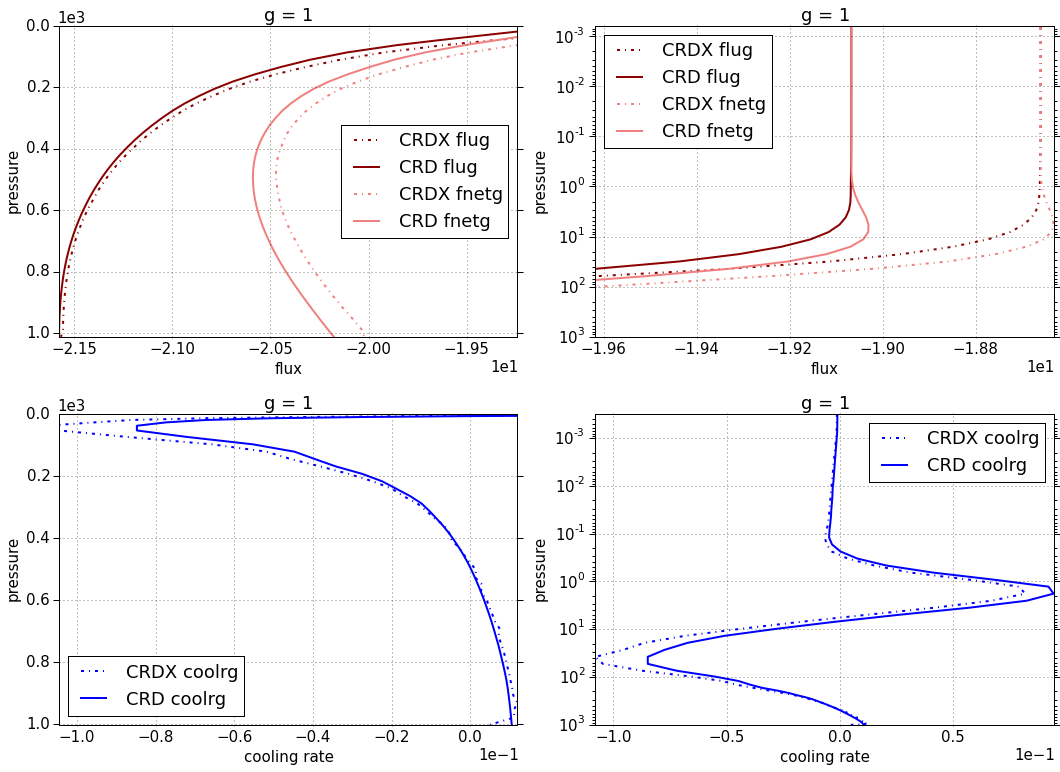

# Figure: flux, cooling rate. g-group 2

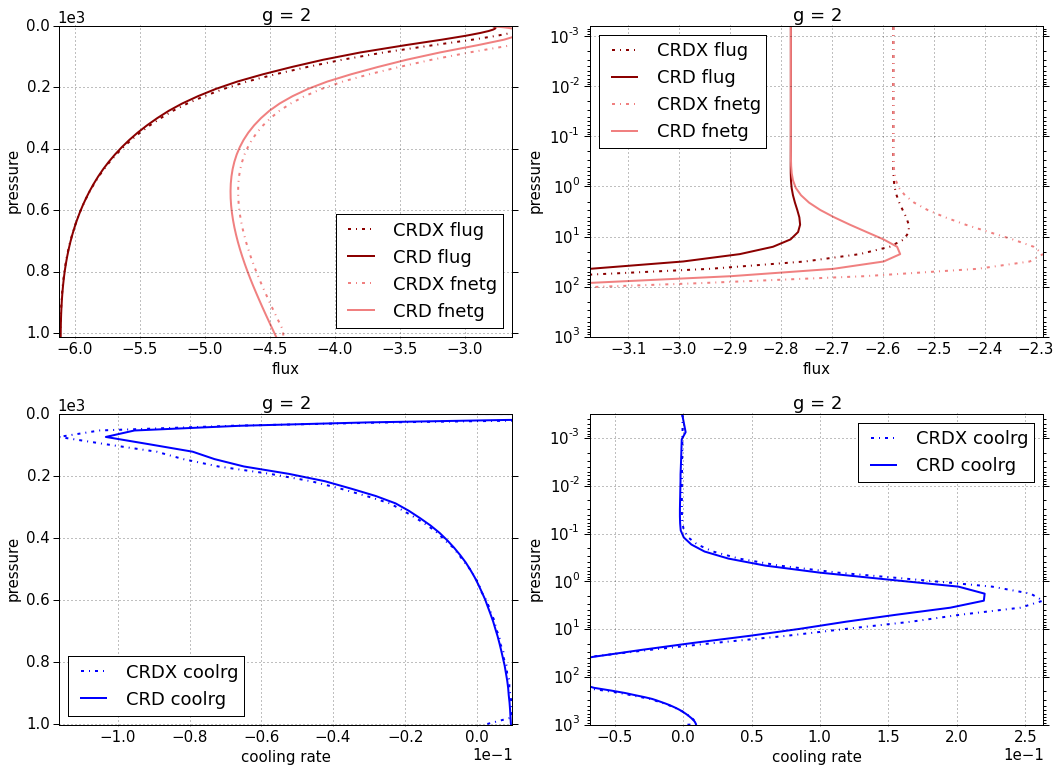

# Figure: flux, cooling rate. g-group 3

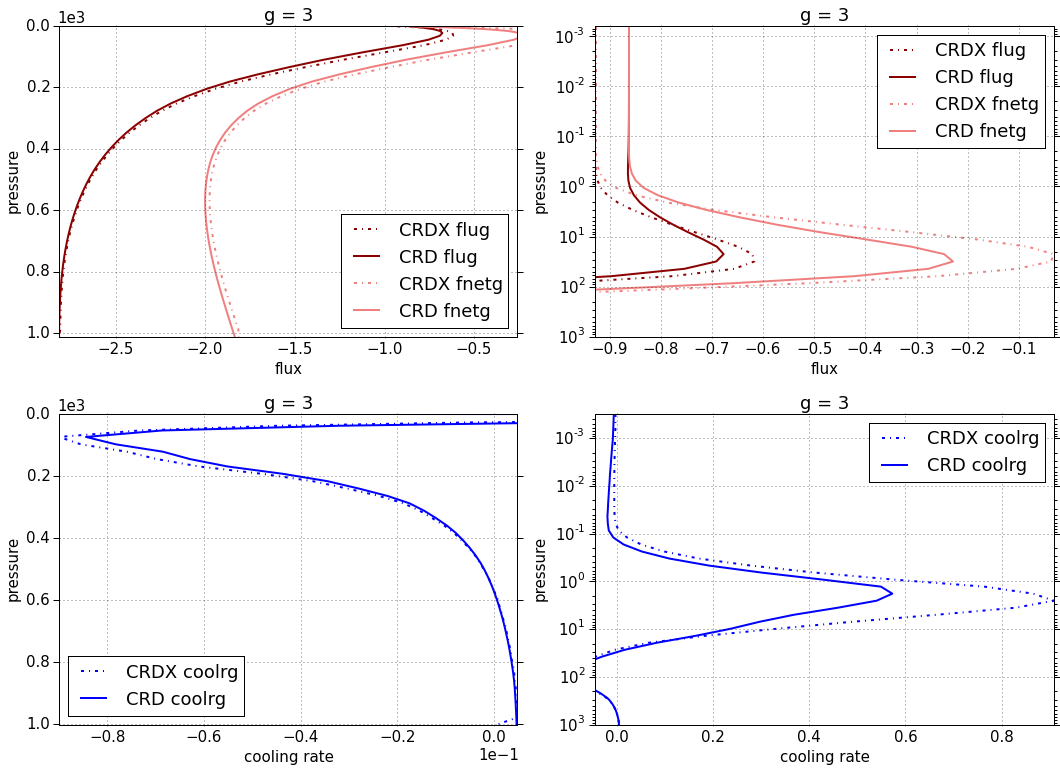

# Figure: flux, cooling rate. g-group 4

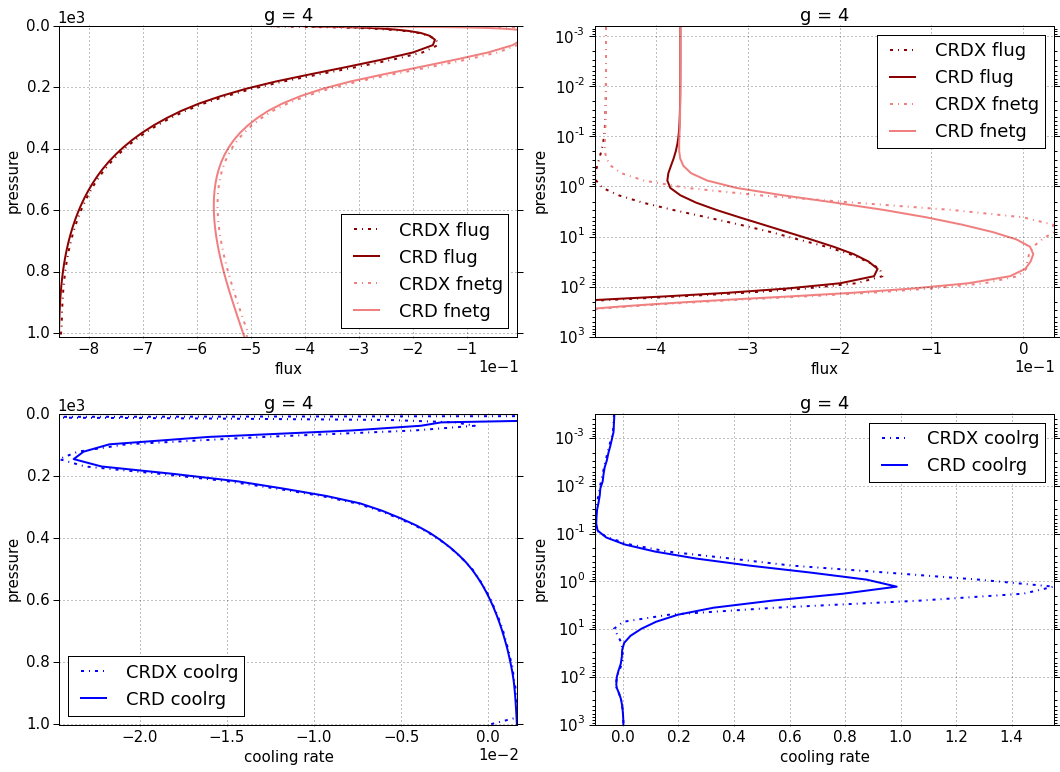

In [15]:
matplotlib.rcParams.update({'font.size': 15,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [32]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -19.067494  0.000000 -19.067494
  1013     76    -21.576110  1.399259 -20.176850
2 0        1      -2.780664  0.000000  -2.780664
  1013     76     -6.107442  1.657447  -4.449995
3 0        1      -0.862144  0.000000  -0.862144
  1013     76     -2.815860  0.980531  -1.835329
4 0        1      -0.373172  0.000000  -0.373172
  1013     76     -0.854823  0.343210  -0.511613


CRDX


flug      fldg      fnetg
g pressure level                                
1 0        1     -18.660002  0.000000 -18.660002
  1013     76    -21.566174  1.545296 -20.020879
2 0        1      -2.579455  0.000000  -2.579455
  1013     76     -6.120093  1.726042  -4.394051
3 0        1      -0.927570  0.000000  -0.927570
  1013     76     -2.815474  1.001474  -1.814000
4 0        1      -0.454071  0.000000  -0.454071
  1013     76     -0.852494  0.345415  -0.507079


CRDX - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.407492  0.000000  0.407492
  1013     76     0.009936  0.146036  0.155971
2 0        1      0.201210  0.000000  0.201210
  1013     76    -0.012652  0.068596  0.055944
3 0        1     -0.065426  0.000000 -0.065426
  1013     76     0.000386  0.020943  0.021329
4 0        1     -0.080899  0.000000 -0.080899
  1013     76     0.002330  0.002205  0.004534

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.001018
  1001.112500 75     0.010588
2 0.000312    1     -0.000787
  1001.112500 75     0.009433
3 0.000312    1     -0.006022
  1001.112500 75     0.004691
4 0.000312    1     -0.030786
  1001.112500 75     0.001645


CRDX


coolrg
g pressure    layer          
1 0.000312    1     -0.001236
  1001.112500 75     0.004932
2 0.000312    1     -0.000451
  1001.112500 75     0.001996
3 0.000312    1     -0.002661
  1001.112500 75     0.000503
4 0.000312    1     -0.032144
  1001.112500 75     0.000013


CRDX - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000218
  1001.112500 75    -0.005657
2 0.000312    1      0.000336
  1001.112500 75    -0.007437
3 0.000312    1      0.003362
  1001.112500 75    -0.004188
4 0.000312    1     -0.001358
  1001.112500 75    -0.001632

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.083474,0.000000,-23.083474
1013,76,-31.354235,4.380447,-26.973788



CRDX


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.621097,0.000000,-22.621097
1013,76,-31.354235,4.618226,-26.736009



CRDX - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,4.623767e-01,0.000000,0.462377
1013,76,4.300000e-07,0.237779,0.237778


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.038613
1001.112500,75,0.026357



CRDX


,,coolrg
pressure,layer,
0.000312,1,-0.036491
1001.112500,75,0.007444



CRDX - CRD


,,coolrg
pressure,layer,
0.000312,1,0.002123
1001.112500,75,-0.018913


In [40]:
s = 'Table: flux. g-group 1'
html = getHTML_idanchor(s)
markdown = getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=1).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crdx                                           crd        \
               g level       flug          fldg      fnetg   g level   
pressure                                                               
0.000000       1     1 -18.660002  0.000000e+00 -18.660002   1     1   
0.000624       1     2 -18.660002  2.316210e-08 -18.660002   1     2   
0.000876       1     3 -18.660002  3.376487e-08 -18.660002   1     3   
0.001229       1     4 -18.660003  5.220124e-08 -18.660003   1     4   
0.001723       1     5 -18.660003  8.343272e-08 -18.660003   1     5   
0.002417       1     6 -18.660003  1.351535e-07 -18.660003   1     6   
0.003391       1     7 -18.660003  2.193797e-07 -18.660003   1     7   
0.004757       1     8 -18.660004  3.547094e-07 -18.660004   1     8   
0.006672       1     9 -18.660005  5.697990e-07 -18.660004   1     9   
0.009359       1    10 -18.660006  9.086532e-07 -18.660005   1    10   
0.013128       1    11 -18.660008  1.438554e-06 -18.660007   1    11   
0.018414       1    12 -18.660012  2.262211e-06 -18.660010   1    12   
0.025830       1    13 -18.660017  3.535639e-06 -18.660013   1    13   
0.036232       1    14 -18.660024  5.496200e-06 -18.660019   1    14   
0.050823       1    15 -18.660036  8.529001e-06 -18.660027   1    15   
0.071291       1    16 -18.660053  1.360197e-05 -18.660040   1    16   
0.100000       1    17 -18.660084  2.425834e-05 -18.660060   1    17   
0.140271       1    18 -18.660140  4.959910e-05 -18.660091   1    18   
0.196760       1    19 -18.660238  1.082190e-04 -18.660130   1    19   
0.275997       1    20 -18.660402  2.395656e-04 -18.660163   1    20   
0.387100       1    21 -18.660643  5.267086e-04 -18.660116   1    21   
0.543100       1    22 -18.660975  1.142534e-03 -18.659833   1    22   
0.761700       1    23 -18.661450  2.427660e-03 -18.659022   1    23   
1.068500       1    24 -18.661951  5.006779e-03 -18.656944   1    24   
1.498800       1    25 -18.662679  9.776522e-03 -18.652903   1    25   
2.102400       1    26 -18.664443  1.739650e-02 -18.647047   1    26   
2.949000       1    27 -18.669146  2.884122e-02 -18.640305   1    27   
4.136600       1    28 -18.678961  4.453500e-02 -18.634426   1    28   
5.802500       1    29 -18.696376  6.436737e-02 -18.632008   1    29   
8.139200       1    30 -18.725750  8.904842e-02 -18.636701   1    30   
...          ...   ...        ...           ...        ...  ..   ...   
323.524990     1    47 -21.059254  6.726874e-01 -20.386567   1    47   
347.299990     1    48 -21.109121  6.968796e-01 -20.412241   1    48   
371.075010     1    49 -21.154269  7.233922e-01 -20.430877   1    49   
394.850010     1    50 -21.193954  7.480514e-01 -20.445902   1    50   
418.625000     1    51 -21.233280  7.741019e-01 -20.459178   1    51   
442.399990     1    52 -21.268091  8.010272e-01 -20.467064   1    52   
466.174990     1    53 -21.299767  8.284204e-01 -20.471346   1    53   
489.950010     1    54 -21.328356  8.564667e-01 -20.471889   1    54   
513.724980     1    55 -21.354530  8.869923e-01 -20.467537   1    55   
537.500000     1    56 -21.378484  9.144185e-01 -20.464065   1    56   
561.275020     1    57 -21.398466  9.430556e-01 -20.455410   1    57   
585.049990     1    58 -21.420174  9.723683e-01 -20.447805   1    58   
608.825010     1    59 -21.438456  1.002298e+00 -20.436158   1    59   
632.599980     1    60 -21.455081  1.032577e+00 -20.422504   1    60   
656.375000     1    61 -21.470048  1.063361e+00 -20.406687   1    61   
680.150020     1    62 -21.483521  1.094637e+00 -20.388885   1    62   
703.924990     1    63 -21.495624  1.127965e+00 -20.367659   1    63   
727.700010     1    64 -21.506358  1.159061e+00 -20.347297   1    64   
751.474980     1    65 -21.515804  1.190636e+00 -20.325169   1    65   
775.250000     1    66 -21.524018  1.222803e+00 -20.301215   1    66   
799.025020     1    67 -21.531053  1.255143e+00 -20.275911   1    67   
822.799990     1    68 -21.537018  1.287612e+00 -20.

In [22]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')